# Star Wars Exploration

This notebook serves to get a rough idea of the data and does some basic exploration.

In [ ]:
# Import
import os
import json
import community
import numpy as np
import pandas as pd
import nxviz as nxv
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

## Data Load

In [ ]:
DATA_PATH = './data'
FILES = dict()
for file_name in os.listdir(DATA_PATH):
    full_file_path = os.path.join(DATA_PATH, file_name)
    FILES[os.path.splitext(file_name)[0]] = full_file_path

for k, v in FILES.items():
    print(k, '->', v)

starwars-episode-5-interactions -> ./data/starwars-episode-5-interactions.json
starwars-episode-3-interactions -> ./data/starwars-episode-3-interactions.json
starwars-episode-1-mentions -> ./data/starwars-episode-1-mentions.json
starwars-episode-4-mentions -> ./data/starwars-episode-4-mentions.json
starwars-full-interactions-allCharacters-merged -> ./data/starwars-full-interactions-allCharacters-merged.json
starwars-episode-6-mentions -> ./data/starwars-episode-6-mentions.json
starwars-episode-4-interactions -> ./data/starwars-episode-4-interactions.json
starwars-episode-3-mentions -> ./data/starwars-episode-3-mentions.json
starwars-episode-2-interactions -> ./data/starwars-episode-2-interactions.json
starwars-episode-7-interactions -> ./data/starwars-episode-7-interactions.json
starwars-episode-1-interactions-allCharacters -> ./data/starwars-episode-1-interactions-allCharacters.json
starwars-episode-3-interactions-allCharacters -> ./data/starwars-episode-3-interactions-allCharacters.j

We have various files. Per episode interactions or mentions and also a complete aggregation.

Loading a specific file:

In [ ]:
with open(FILES['starwars-full-interactions-allCharacters']) as f:
    data = json.load(f)
print(f'Total Nodes: {len(data["nodes"])}\nSample: {data["nodes"][0]}')
print(f'Total Links: {len(data["links"])}\nSample: {data["links"][0]}')

Total Nodes: 112
Sample: {'name': 'R2-D2', 'value': 171, 'colour': '#bde0f6'}
Total Links: 450
Sample: {'source': 1, 'target': 0, 'value': 17}


## Building Graph

In [ ]:
def make_graph(nodes, edges):
    G = nx.Graph()
    for node in nodes:
        G.add_node(node['name'], **dict(zip(node.keys(),node.values())))
    for edge in data['links']:
        G.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'], **dict(zip(edge.keys(),edge.values())))
    return G
universe = make_graph(data['nodes'], data['links'])
print(nx.info(universe))

Name: 
Type: Graph
Number of nodes: 112
Number of edges: 450
Average degree:   8.0357


In [ ]:
len(universe.nodes())

112

In [ ]:
n_nodes = len(data['nodes'])
n_absent = n_nodes - len(universe.nodes())
print(f'Missing {n_absent} nodes')

Missing 0 nodes


## Draw the network

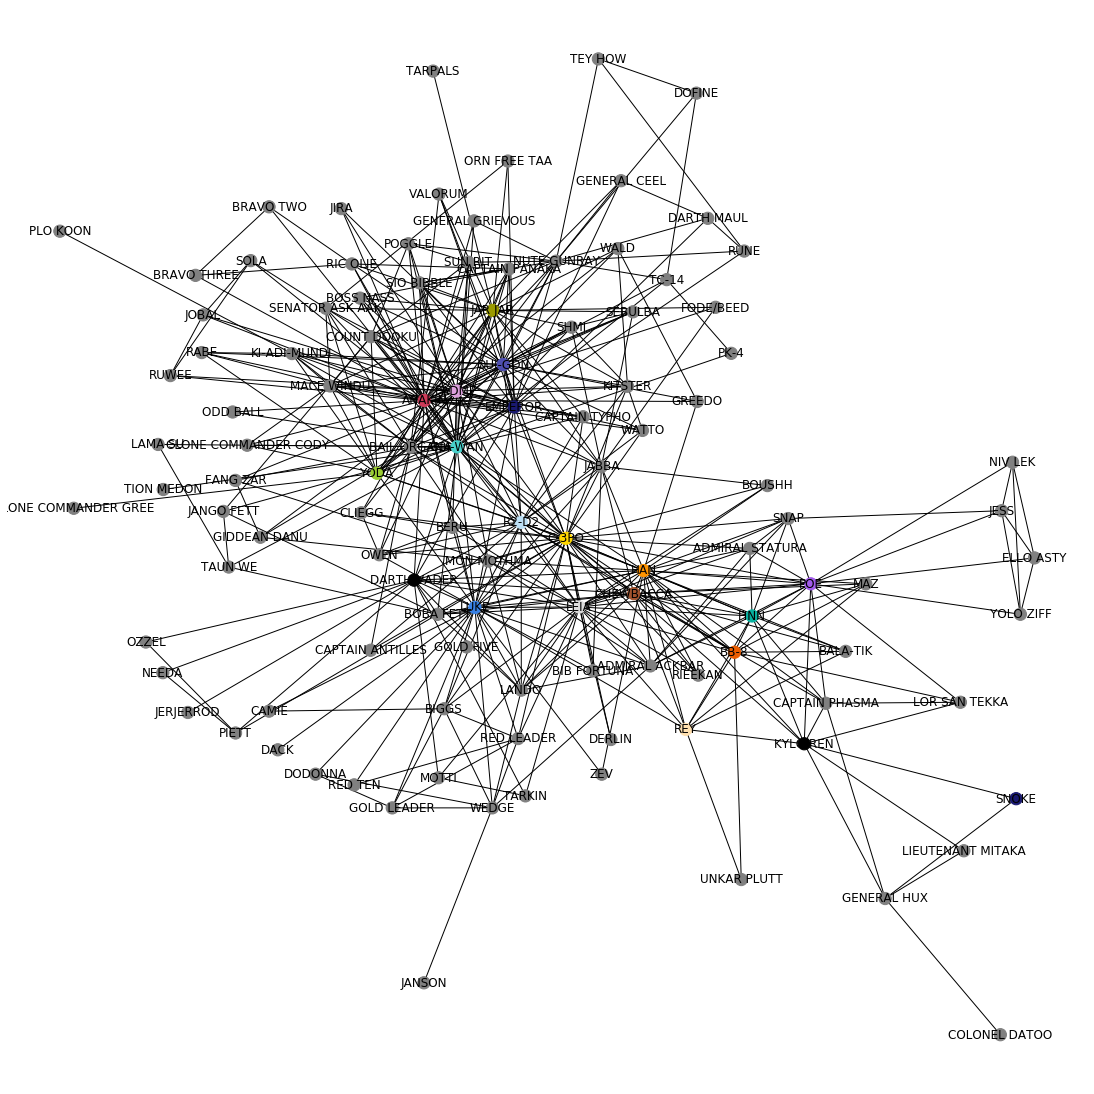

In [ ]:
shapes = [".", "o", "v", "^", "3", "4", "8", "s", "p", "P", "*", "+", "X", "D", "d", "|", "_"]
coords = nx.kamada_kawai_layout(universe)

colors = list()
for i in universe.nodes():
    colors.append(universe.nodes()[i]['colour']) 

options = {
    'node_color': colors,
    'node_size': 150,
    'width': 1,
    'with_labels': True,
    'pos': coords
}

plt.figure(figsize=(15,15))
nx.draw(universe, **options)

## Find Communities

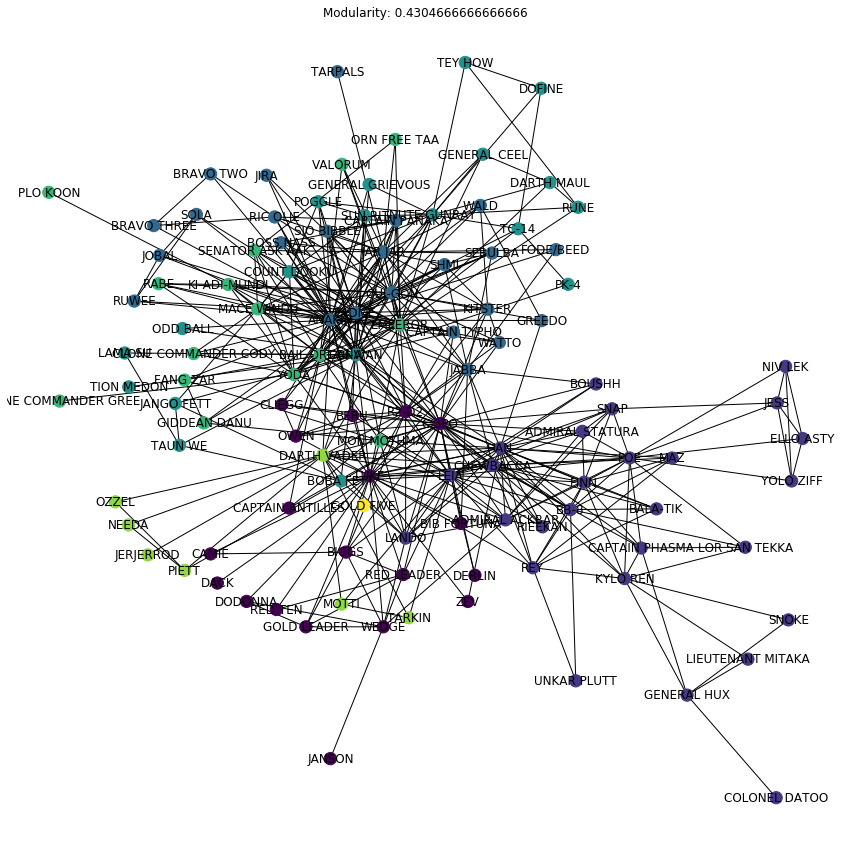

In [ ]:
comm = community.best_partition(universe)
mod = community.modularity(comm, universe)

options = {
    'node_color': list(comm.values()),
    'node_size': 150,
    'width': 1,
    'with_labels': True,
    'pos': coords
}

plt.figure(figsize=(15,15))
plt.title(f'Modularity: {mod}')
nx.draw(universe, **options)

In [ ]:
edge_weights = list()
for (_, _, d) in universe.edges(data=True):
    edge_weights.append(d['value'])

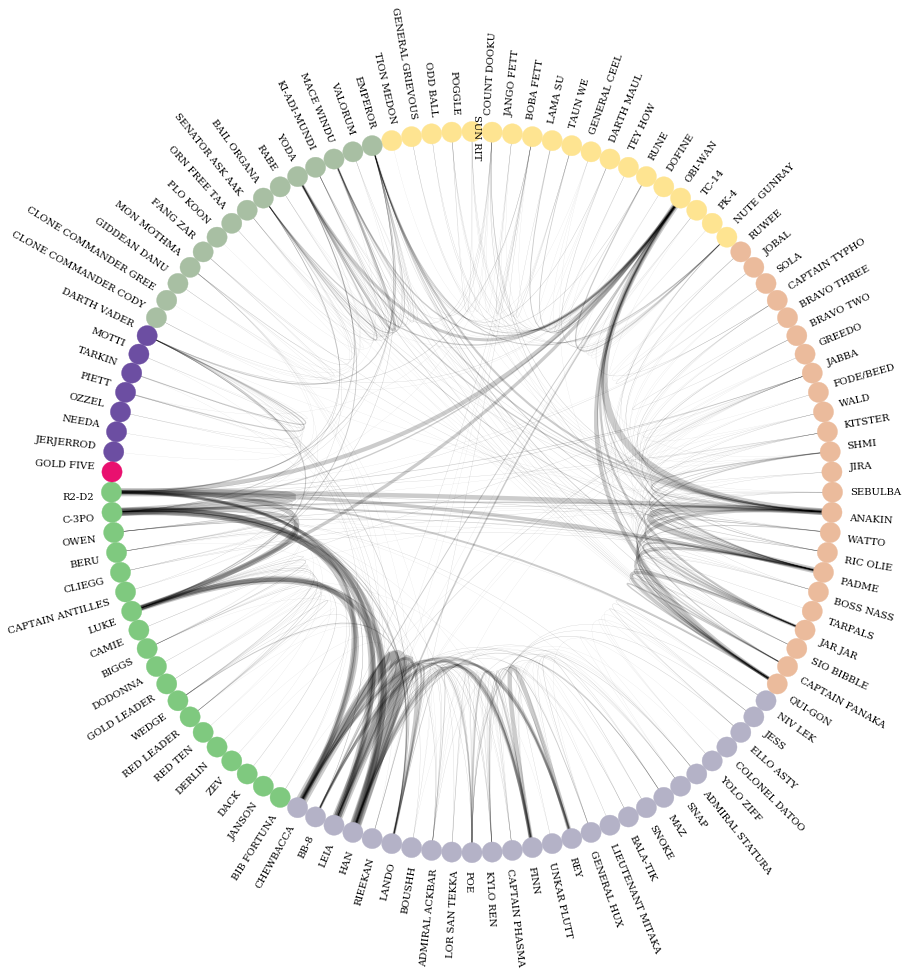

In [ ]:
for node in data['nodes']:
    node['cmt'] = comm[node['name']]

community_universe = make_graph(data['nodes'], data['links'])   
c = nxv.CircosPlot(community_universe, node_color='cmt', node_grouping='cmt',
                   edge_width=(edge_weights / np.quantile(edge_weights, 0.85)).tolist(),
                   node_labels=True, node_label_layout='rotation',
                   figsize=(15,15))
c.draw()

### Question: What kind of communities are we detecting here? Are they episode related?

Maybe another look helps. Let's split up the communities.

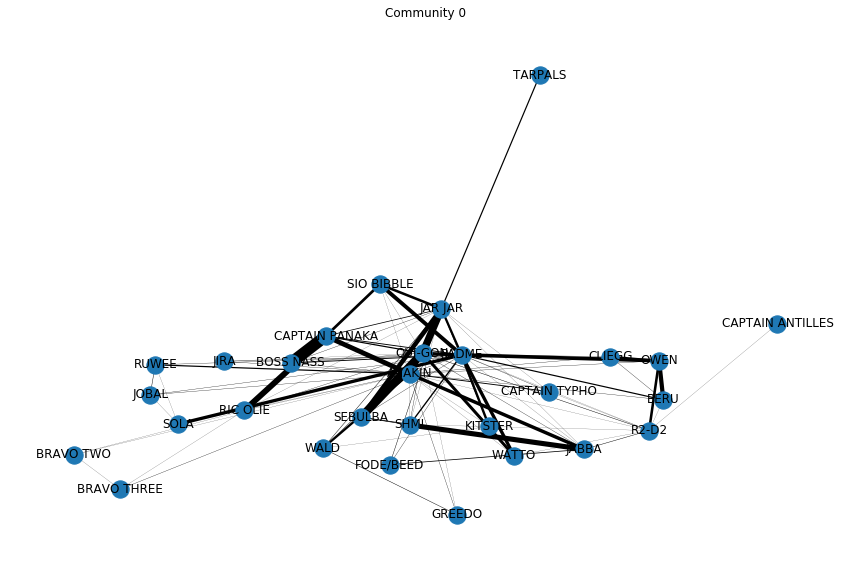

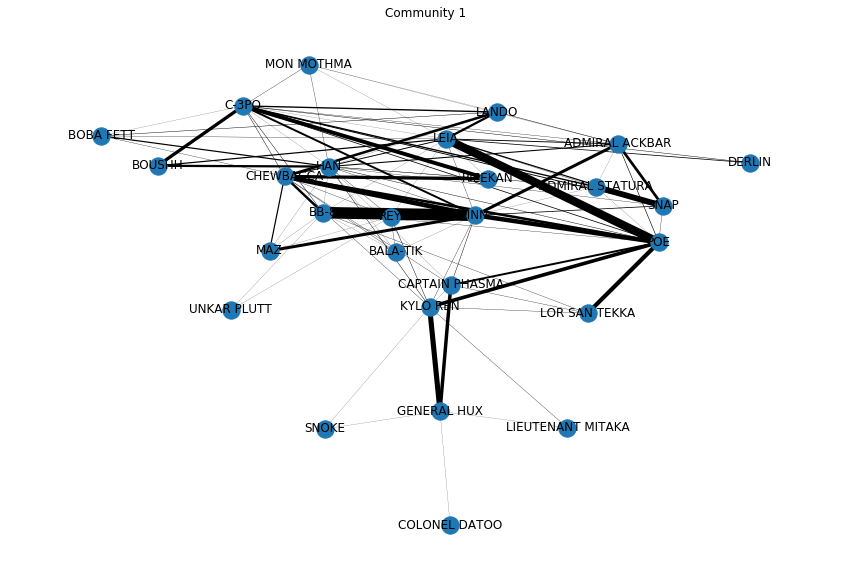

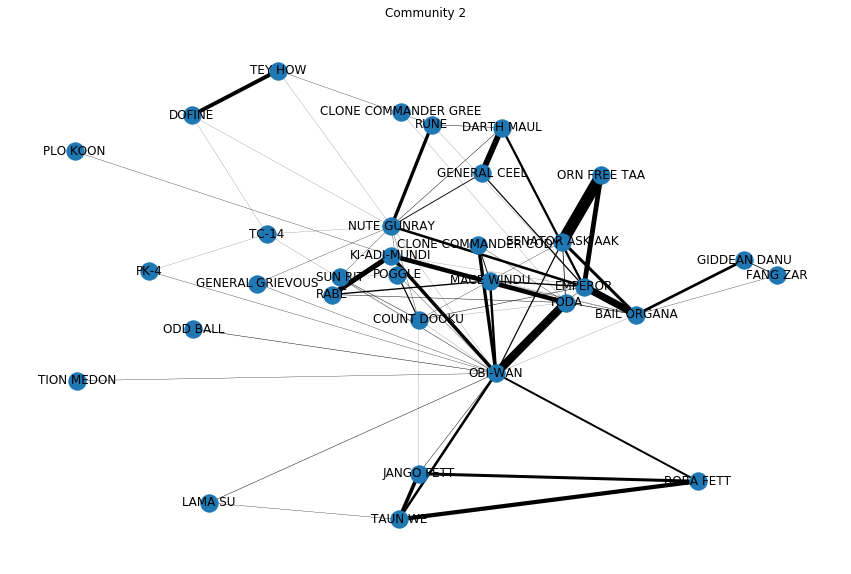

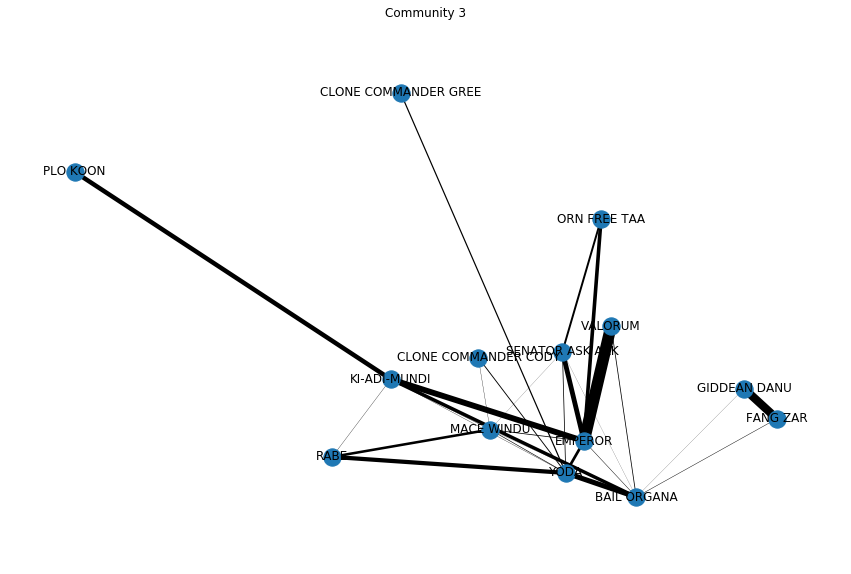

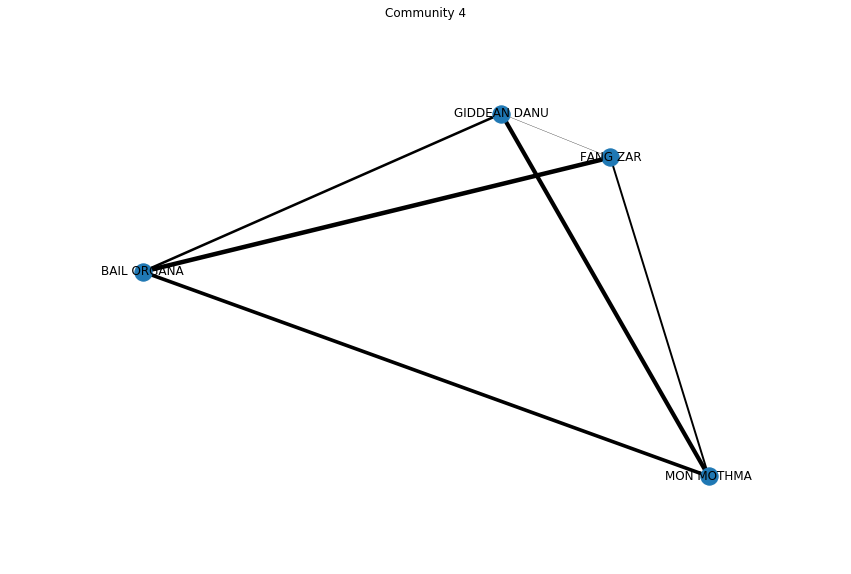

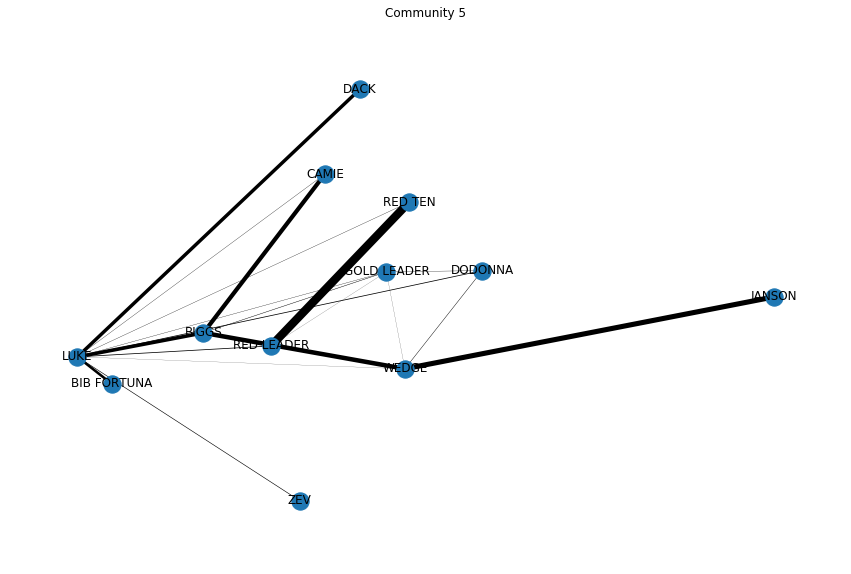

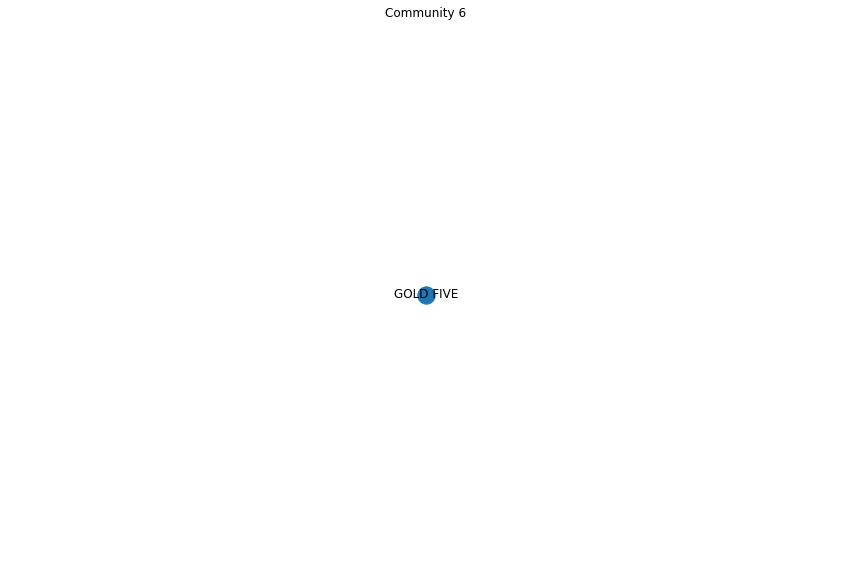

In [ ]:
pos = nx.spring_layout(community_universe)
for comm_num in np.unique(list(comm.values())):
    partition = community.best_partition(community_universe)
    partition_nodes = list()
    for node, c in partition.items():
        if c == comm_num:
            partition_nodes.append(node)
        else:
            partition[node] = -1
    sub_universe = community_universe.subgraph(partition_nodes)
    edge_widths = (edge_weights / np.quantile(edge_weights, 0.85)).tolist()
    # Plot
    fig, ax = plt.subplots(figsize=(15,10))
    nx.draw(sub_universe, pos, with_labels=True, width=edge_widths)
    ax.set_title(f'Community {comm_num}');


## Calculating Important Characters

[Text(0, 0, 'ANAKIN'),
 Text(0, 0, 'OBI-WAN'),
 Text(0, 0, 'C-3PO'),
 Text(0, 0, 'PADME'),
 Text(0, 0, 'QUI-GON'),
 Text(0, 0, 'LUKE'),
 Text(0, 0, 'HAN'),
 Text(0, 0, 'LEIA'),
 Text(0, 0, 'JAR JAR'),
 Text(0, 0, 'R2-D2'),
 Text(0, 0, 'EMPEROR'),
 Text(0, 0, 'CHEWBACCA'),
 Text(0, 0, 'YODA'),
 Text(0, 0, 'BAIL ORGANA'),
 Text(0, 0, 'DARTH VADER'),
 Text(0, 0, 'NUTE GUNRAY'),
 Text(0, 0, 'POE'),
 Text(0, 0, 'JABBA'),
 Text(0, 0, 'FINN'),
 Text(0, 0, 'MACE WINDU'),
 Text(0, 0, 'BB-8'),
 Text(0, 0, 'LANDO'),
 Text(0, 0, 'ADMIRAL ACKBAR'),
 Text(0, 0, 'BOBA FETT'),
 Text(0, 0, 'COUNT DOOKU')]

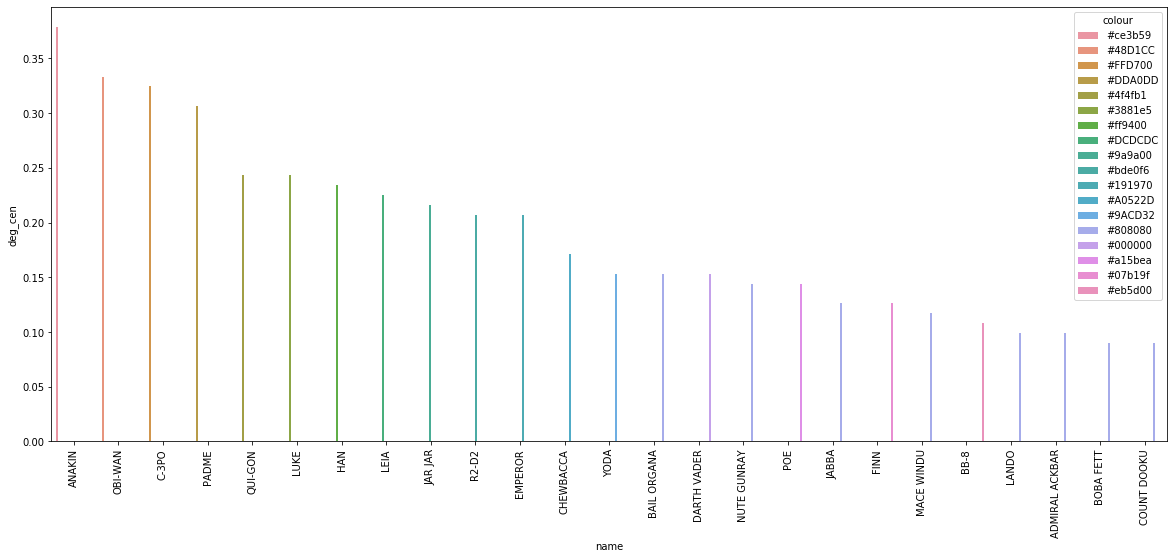

In [ ]:
deg_cen = nx.degree_centrality(universe)
for node in data['nodes']:
    node['deg_cen'] = deg_cen[node['name']]

important_universe = make_graph(data['nodes'], data['links'])
important_nodes_df = pd.DataFrame(sorted(data['nodes'], key=lambda item: item['deg_cen'], reverse=True)[:25])
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=important_nodes_df, 
            x='name', y='deg_cen', hue='colour', 
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

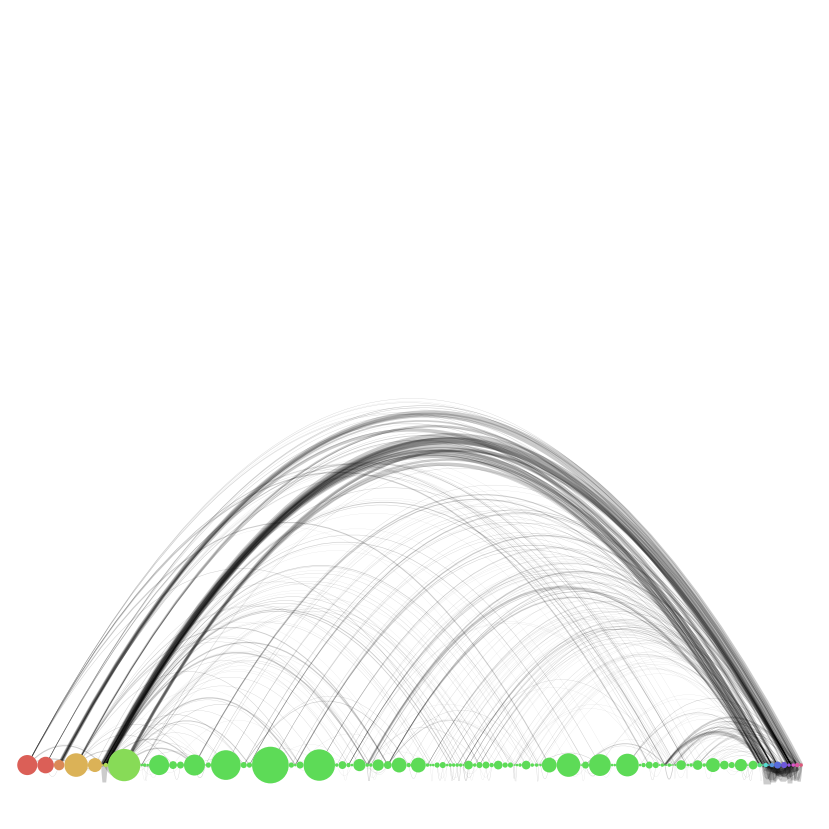

In [ ]:
a = nxv.ArcPlot(important_universe, node_color='colour', node_grouping='colour', 
                node_size=[10*important_universe.nodes[n]['deg_cen'] for n in important_universe.nodes], 
                edge_width=(edge_weights / np.quantile(edge_weights, 0.85)).tolist(),
                node_labels=True,
                figsize=(15,15))
a.draw()